In [1]:
import nltk
from konlpy.corpus import kobill
import pandas as pd
files_ko = kobill.fileids()

In [2]:
df1 = pd.read_csv('./data/test_set_final.csv')
df2 = pd.read_csv('./data/hotel_review_label1.csv')

In [3]:
df1 = df1[['stay_date', 'review', 'score']]
df2 = df2[['stay_date', 'review', 'score']]
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [4]:
df

,stay_date,review,score
0,2021-07-01,이그제큐티브 라운지 칵테일 뷔페는 생각보다 넘 별로였어요 메뉴가 얼마 없어서 ifc...,50
1,2021-07-01,직원분들 모두들 너무 친전하셨고 말하지 않아도 무엇이 필요한지 먼저 오퍼해 주셨어요...,50
2,2021-07-01,가격대비 메리크가 없으며 이제는 가격을 어느정도 지불해야지만 앞의 조망을 즐길수 있...,20
3,2021-07-01,가족들과 즐거운 여름 휴가를 보낼 수 있었습니다 더운 여름이었지만 11시쯤 걸어다닌...,50
4,2021-07-01,위치 주차 시설 서비스 등 호텔이 제공해야 할 모든면이 편리하고 좋았다 자녀들과 함...,50
...,...,...,...
12969,2021-07-01,화장실 냄새나고 직원불친절 합니다 특히 차량진입 입구 짐내리는곳 티비 동작안되고 5...,20
12970,2021-07-01,개관한지 오래되었으면 특급호텔은 리모델링을 해야하는데 욕실 객실카펫등의 룸컨디션이 ...,10
12971,2021-07-01,구경할수 있는 해안가는 모두 막혀 있고 실내 및 야외 수영장은 모두 마스크 벗고 밀...,10
12972,2021-07-01,올데이라운지 사용이 매우 좋았습니다 올데이라운지를 사용한다면 트로피칼 3단세트를 추...,50


In [5]:
df['stay_date'] = pd.to_datetime(df['stay_date'])
df.sort_values(by='stay_date', inplace=True)
df.reset_index(inplace=True)

In [6]:
df

,index,stay_date,review,score
0,3617,2018-06-01,역에서 가까워서 이동하기에도 좋고 조식에 쌀국수랑 오믈렛 완젼 짱짱 맛있었어요 빵도...,40
1,3571,2018-06-01,구로에서 숙박을 해야할 경우 신라스테이 종종 이용하는데 갈때마다 가격대비 깔끔함과 ...,50
2,3572,2018-06-01,호텔 도착하니 아늑해보이는 로비와 배정받은 객실의 침구가 너무 푹신하여 편안히 투숙...,50
3,3573,2018-06-01,평소 신라스테이 자주 이용하는데 구로도 좋네요 어느 신라스테이를 가더라도 모든 직원...,50
4,3574,2018-06-01,호캉스하러 신라스테이 다른 지점들 투숙해봤는데 이번에는 구로점에 투숙하게됐어요 역시...,50
...,...,...,...,...
12969,1486,2021-07-01,실내수영장이 아니라 물놀이 시설이다 최소한 레인구분 하나정도는 해놔야 진짜 운동으로...,10
12970,12973,2021-07-01,좋다고 리뷰보고 왔는데 7월말 무척더운날에 처음 체크인하고 방에 들어와서 온도를 보...,10
12971,296,2021-08-01,전반적인 친절도와 시설관리는 좋았고 극성수기에 투숙객이 많으니 불편함은 감내하겠으나...,40
12972,295,2021-08-01,오래되었지만 깔끔하고 고급스럽고 친절하고 식음료파트 괜찮았고 전반적으로 좋았지만 체...,50


In [7]:
from konlpy.tag import Okt
t = Okt()

In [8]:
df['tokens'] = df['review'].apply(lambda X : t.nouns(X))

In [10]:
df

,index,stay_date,review,score,tokens
0,3617,2018-06-01,역에서 가까워서 이동하기에도 좋고 조식에 쌀국수랑 오믈렛 완젼 짱짱 맛있었어요 빵도...,40,"[역, 이동, 조식, 쌀국수, 오믈렛, 완젼, 짱짱, 빵, 완젼, 맛, 요, 다음, 꼭]"
1,3571,2018-06-01,구로에서 숙박을 해야할 경우 신라스테이 종종 이용하는데 갈때마다 가격대비 깔끔함과 ...,50,"[구로, 숙박, 경우, 신라, 스테이, 종종, 이용, 때, 가격, 대비, 편의, 만..."
2,3572,2018-06-01,호텔 도착하니 아늑해보이는 로비와 배정받은 객실의 침구가 너무 푹신하여 편안히 투숙...,50,"[호텔, 도착, 로비, 배정, 객실, 침구, 투숙, 수, 쌀국수, 나위, 직원, 서..."
3,3573,2018-06-01,평소 신라스테이 자주 이용하는데 구로도 좋네요 어느 신라스테이를 가더라도 모든 직원...,50,"[평소, 신라, 스테이, 자주, 이용, 구로, 신라, 스테이, 모든, 직원, 가격]"
4,3574,2018-06-01,호캉스하러 신라스테이 다른 지점들 투숙해봤는데 이번에는 구로점에 투숙하게됐어요 역시...,50,"[호캉스, 신라, 스테이, 다른, 지점, 투숙, 이번, 구로, 점, 투숙, 역시, ..."
...,...,...,...,...,...
12969,1486,2021-07-01,실내수영장이 아니라 물놀이 시설이다 최소한 레인구분 하나정도는 해놔야 진짜 운동으로...,10,"[실내수영장, 물놀이, 시설, 최소한, 레인, 구분, 하나, 정도, 해, 진짜, 운..."
12970,12973,2021-07-01,좋다고 리뷰보고 왔는데 7월말 무척더운날에 처음 체크인하고 방에 들어와서 온도를 보...,10,"[리뷰, 보고, 무척, 날, 처음, 체크, 방, 온도, 도, 에어컨, 온도, 도로,..."
12971,296,2021-08-01,전반적인 친절도와 시설관리는 좋았고 극성수기에 투숙객이 많으니 불편함은 감내하겠으나...,40,"[전반, 친절, 도, 시설, 관리, 수기, 투숙, 객, 야외, 수영장, 마스크, 쓰..."
12972,295,2021-08-01,오래되었지만 깔끔하고 고급스럽고 친절하고 식음료파트 괜찮았고 전반적으로 좋았지만 체...,50,"[식, 음료, 파트, 전반, 체크, 때, 로비, 북적, 거렸, 코로나, 상황, 것,..."


In [19]:
def topic_intersection(x, topics):
    result = True
    for topic in topics:
        if topic in x:
            pass
        else:
            result = False
    return result

In [42]:
data = df[df.tokens.apply(topic_intersection, topics=['힐링', '호캉스'] )]
data = data.reset_index(drop=True)

In [43]:
data

,index,stay_date,review,score,tokens
0,4000,2018-09-01,휴식이 필요하던때에 딱 좋은 호텔이네요 호캉스 제대로 즐기고 가요 분위기도 세련되고...,50,"[휴식, 때, 호텔, 요, 호캉스, 제대로, 가요, 분위기, 방도, 모던, 정말, ..."
1,5276,2019-01-01,겨울가족여행으로 숙박 알아보던 중 인터파크에서 막 오픈한 라마다 평창보고 예약했습니...,50,"[겨울, 가족, 여행, 숙박, 중, 인터파크, 막, 오픈, 라마, 평창, 보고, 예..."
2,5685,2019-02-01,호텔 도착 후 전용 체크인층인 15층으로 가면 체크인을 위해 대기 소파에서 준비해 ...,50,"[호텔, 도착, 후, 전용, 체크, 층, 층, 가면, 체크, 위해, 대기, 소파, ..."
3,6051,2019-03-01,가족들과 호캉스를 즐기려고 알아보다가 롯데호텔월드에서 투숙하게 되었어요 근처에 쇼핑...,50,"[가족, 호캉스, 롯데, 호텔, 월드, 투숙, 근처, 쇼핑, 곳도, 호텔, 내, 수..."
4,2605,2019-07-01,호텔을 찾기 어려운 위치가 많은데 여긴 지하철역 바로 앞에 있어서 너무 편해요 근처...,50,"[호텔, 찾기, 위치, 지하철역, 바로, 앞, 근처, 여의도, 공원, 호캉스, 밤,..."
5,7130,2019-07-01,언니친구동생 평균32세 여자끼리의 호캉스를 롯데호텔로 정했어요 어디로 갈지 많이 찾...,50,"[언니, 친구, 동생, 평균, 세, 여자, 끼리, 호캉스, 롯데, 호텔, 정, 어디..."
6,7129,2019-07-01,호캉스겸 명동근처 호텔을 알아보던중 선택한 호텔입니다 명동에서 거리도 완전 가깝구 ...,50,"[호캉스겸, 명동, 근처, 호텔, 중, 선택, 호텔, 명동, 거리, 완전, 역시, ..."
7,7545,2019-08-01,짧은 휴가에 어디갈까 고민하다 호캉스 다녀왔습니다 클럽룸으로 투숙했는데 라운지가 아...,50,"[휴가, 어디, 고민, 호캉스, 클럽룸, 투숙, 라운지, 음식, 하루, 종일, 호텔..."
8,640,2019-08-01,체크인부터 체크아웃까지 호텔에 지냄 석식 풀사이드 바베큐는 대부분의 후기처럼 가성비...,40,"[체크, 체크아웃, 호텔, 석식, 풀, 사이드, 바베큐, 대부분, 후기, 가성, 비..."
9,8414,2019-11-01,오랜만에 가족과 롯데호텔 월드점으로 호캉스를 다녀왔는데 롯데만의 우아한 분위기의 깔...,50,"[만, 가족, 롯데, 호텔, 월드, 점, 호캉스, 롯데, 분위기, 호텔, 푹, 무엇..."


In [46]:
count = data.review.groupby(data.stay_date).count()

<AxesSubplot:xlabel='stay_date'>

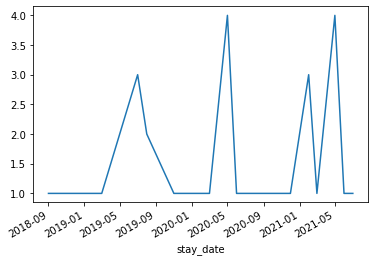

In [47]:
count.plot()